# Cross-Sector Financial Analysis of Saudi Arabian Companies

This notebook conducts a comprehensive financial analysis across four key sectors in Saudi Arabia: Energy, Petrochemicals, Real Estate Development, and Telecommunications. The analysis encompasses:

- Data integration from individual company analyses
- Exploratory data analysis and sector comparisons
- Risk assessment using financial metrics
- Machine learning-based risk classification
- Revenue growth forecasting
- Key insights and observations

**Date:** December 21, 2025  
**Author:** ASEM HAIJ

## Importing Libraries

We import the necessary Python libraries for data manipulation, visualization, machine learning, and file operations.

In [1]:
# Import standard libraries
import os
import glob

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## Data Loading and Integration

In this section, we load and integrate financial data from CSV files across all sectors. We collect data files and insights files separately, then concatenate them into master DataFrames.

In [3]:

#BASE_DIR = ".."  # Adjust as necessary 

# Define the sectors to analyze
sectors = ['Energy', 'Petrochemicals', 'Real Estate Development', 'Telecommunications']

# Collect all CSV files from each sector directory
all_companies = []
for sector in sectors:
    all_companies.append(glob.glob(os.path.join(sector, "*.csv")))

print("All companies files found:", all_companies)

All companies files found: [['Energy\\energy_sector_clean.csv', 'Energy\\energy_sector_insights.csv'], ['Petrochemicals\\petrochemicals_sector_clean.csv', 'Petrochemicals\\petrochemicals_sector_insights.csv'], ['Real Estate Development\\real_estate_sector_clean.csv', 'Real Estate Development\\real_estate_sector_insights.csv'], ['Telecommunications\\telecommunications_sector_clean.csv', 'Telecommunications\\telecommunications_sector_insights.csv']]


In [4]:
# Separate data files and insights files
wanted_datasets = []
wanted_insights = []

for sector_companies in all_companies:
    for company_file in sector_companies:
        if "insights" in company_file.lower():
            wanted_insights.append(company_file)
        else:
            wanted_datasets.append(company_file)

print("Data files to load:", wanted_datasets)
print("Insights files to load:", wanted_insights)

Data files to load: ['Energy\\energy_sector_clean.csv', 'Petrochemicals\\petrochemicals_sector_clean.csv', 'Real Estate Development\\real_estate_sector_clean.csv', 'Telecommunications\\telecommunications_sector_clean.csv']
Insights files to load: ['Energy\\energy_sector_insights.csv', 'Petrochemicals\\petrochemicals_sector_insights.csv', 'Real Estate Development\\real_estate_sector_insights.csv', 'Telecommunications\\telecommunications_sector_insights.csv']


In [5]:
# Load and concatenate all data files into a master DataFrame
dfs = []
for dataset_file in wanted_datasets:
    df = pd.read_csv(dataset_file)
    dfs.append(df)

master_df = pd.concat(dfs, ignore_index=True)
print("Master DataFrame shape:", master_df.shape)
display(master_df.head(15))

Master DataFrame shape: (72, 13)


,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR,Revenue_Growth_%,Operating_Margin_%,Net_Profit_Margin_%,Liabilities_to_Assets_Ratio,Asset_Turnover_Ratio
0,2019,ACWA Power,Energy,4.114999e+06,880083.0,918471.0,3.774754e+07,27142160.0,NaN,22.320078,21.387198,71.904453,0.109014
1,2020,ACWA Power,Energy,4.829111e+06,902387.0,1767939.0,3.626099e+07,28860832.0,17.353880,36.610030,18.686400,79.591965,0.133176
2,2021,ACWA Power,Energy,5.360940e+06,743908.0,1836995.0,4.570870e+07,31388553.0,11.012979,34.266285,13.876447,68.670853,0.117285
3,2022,ACWA Power,Energy,5.275930e+06,1476410.0,2363251.0,4.884592e+07,28817526.0,-1.585729,44.793070,27.983882,58.996792,0.108012
4,2023,ACWA Power,Energy,6.095010e+06,1771329.0,2983572.0,5.501831e+07,34309423.0,15.524846,48.951060,29.061954,62.360004,0.110781
5,2024,ACWA Power,Energy,6.297298e+06,1987836.0,3011901.0,5.688271e+07,32576949.0,3.318912,47.828465,31.566491,57.270393,0.110707
6,2019,Aldrees Petroleum,Energy,5.681129e+06,291744.0,398815.0,3.585220e+06,2710453.0,NaN,7.019995,5.135317,75.600744,1.584597
7,2020,Aldrees Petroleum,Energy,4.974081e+06,121083.0,205926.0,4.462753e+06,3570271.0,-12.445554,4.139981,2.434279,80.001537,1.114577
8,2021,Aldrees Petroleum,Energy,9.109615e+06,176805.0,285131.0,5.435393e+06,4440243.0,83.141670,3.130001,1.940861,81.691296,1.675981
9,2022,Aldrees Petroleum,Energy,1.235608e+07,241828.0,370682.0,6.315582e+06,5206238.0,35.637774,2.999997,1.957158,82.434810,1.956443


In [6]:
# Load and concatenate all insights files into a master insights DataFrame
insights_dfs = []
for insights_file in wanted_insights:
    df = pd.read_csv(insights_file)
    insights_dfs.append(df)

master_insights_df = pd.concat(insights_dfs, ignore_index=True)
print("Master Insights DataFrame shape:", master_insights_df.shape)
display(master_insights_df)

Master Insights DataFrame shape: (12, 8)


,Company_Name,Revenue_Growth_%,Operating_Margin_%,Net_Profit_Margin_%,Liabilities_to_Assets_Ratio,Asset_Turnover_Ratio,Revenue_Growth_Volatility,Revenue_CAGR
0,ACWA Power,9.124978,39.128165,23.760395,66.465743,0.114829,8.072598,8.882204
1,Aldrees Petroleum,31.283492,3.798405,2.518873,80.956724,1.765389,34.453298,27.694737
2,Aramco,16.707330,52.556759,22.370623,34.694476,0.676189,43.364227,10.442938
3,Petro Rabigh,12.684170,5.302288,7.901969,85.018185,0.600625,57.767487,2.927856
4,SABIC,2.825026,8.796109,5.457266,83.481480,0.493779,28.363753,0.034700
5,Sipchem,11.017266,22.651797,28.488327,32.725146,0.329286,44.102810,5.355636
6,Dar Alarkan,9.832209,27.903332,11.713791,39.144359,0.094115,44.856648,1.485433
7,Emaar Economic City,9.726933,-119.861611,-186.456812,59.122148,0.038517,99.507427,-14.763912
8,Jabel Omar,53.765230,46.817225,191.812729,60.945291,0.033631,90.672868,16.521067
9,Mobily,6.252047,13.354223,8.992236,58.585698,0.400213,1.544684,6.243104


## Exploratory Cross-Sector Analysis

This section performs exploratory data analysis across sectors. We map companies to their respective sectors and create aggregated sector-level statistics.

In [7]:
# Create a mapping from company names to sectors
company_to_sector = {
    # Energy sector companies
    "ACWA Power": "Energy",
    "Aldrees Petroleum": "Energy",
    "Aramco": "Energy",

    # Petrochemicals sector companies
    "Petro Rabigh": "Petrochemicals",
    "SABIC": "Petrochemicals",
    "Sipchem": "Petrochemicals",

    # Real Estate Development sector companies
    "Dar Alarkan": "Real Estate Development",
    "Emaar Economic City": "Real Estate Development",
    "Jabel Omar": "Real Estate Development",

    # Telecommunications sector companies
    "Mobily": "Telecommunications",
    "STC": "Telecommunications",
    "Zain KSA": "Telecommunications",
}

# Add sector column to the master insights DataFrame
master_insights_df['Sector'] = master_insights_df['Company_Name'].map(company_to_sector)

missing = master_insights_df[master_insights_df["Sector"].isna()]["Company_Name"].unique()
print("Unmapped companies:", missing)


Unmapped companies: []


In [8]:
# Reorder columns to place 'Sector' next to 'Company_Name'
col_index = master_insights_df.columns.get_loc("Company_Name") + 1

cols = master_insights_df.columns.tolist()
cols.insert(col_index, cols.pop(cols.index("Sector")))

master_insights_df = master_insights_df[cols]

In [9]:
# Display the updated master insights DataFrame
master_insights_df

,Company_Name,Sector,Revenue_Growth_%,Operating_Margin_%,Net_Profit_Margin_%,Liabilities_to_Assets_Ratio,Asset_Turnover_Ratio,Revenue_Growth_Volatility,Revenue_CAGR
0,ACWA Power,Energy,9.124978,39.128165,23.760395,66.465743,0.114829,8.072598,8.882204
1,Aldrees Petroleum,Energy,31.283492,3.798405,2.518873,80.956724,1.765389,34.453298,27.694737
2,Aramco,Energy,16.707330,52.556759,22.370623,34.694476,0.676189,43.364227,10.442938
3,Petro Rabigh,Petrochemicals,12.684170,5.302288,7.901969,85.018185,0.600625,57.767487,2.927856
4,SABIC,Petrochemicals,2.825026,8.796109,5.457266,83.481480,0.493779,28.363753,0.034700
5,Sipchem,Petrochemicals,11.017266,22.651797,28.488327,32.725146,0.329286,44.102810,5.355636
6,Dar Alarkan,Real Estate Development,9.832209,27.903332,11.713791,39.144359,0.094115,44.856648,1.485433
7,Emaar Economic City,Real Estate Development,9.726933,-119.861611,-186.456812,59.122148,0.038517,99.507427,-14.763912
8,Jabel Omar,Real Estate Development,53.765230,46.817225,191.812729,60.945291,0.033631,90.672868,16.521067
9,Mobily,Telecommunications,6.252047,13.354223,8.992236,58.585698,0.400213,1.544684,6.243104


In [10]:
# Aggregate data by sector to create sector-level summary statistics
sector_df = (
    master_insights_df
    .groupby("Sector")
    .agg(
        Companies_Count=("Company_Name", "nunique"),
        Revenue_Growth_Avg=("Revenue_Growth_%", "mean"),
        Operating_Margin_Avg=("Operating_Margin_%", "mean"),
        Net_Profit_Margin_Avg=("Net_Profit_Margin_%", "mean"),
        Leverage_Avg=("Liabilities_to_Assets_Ratio", "mean"),
        Asset_Turnover_Avg=("Asset_Turnover_Ratio", "mean"),
        Volatility_Avg=("Revenue_Growth_Volatility", "mean"),
        CAGR_Avg=("Revenue_CAGR", "mean"),
    )
    .reset_index()
)

display(sector_df)

,Sector,Companies_Count,Revenue_Growth_Avg,Operating_Margin_Avg,Net_Profit_Margin_Avg,Leverage_Avg,Asset_Turnover_Avg,Volatility_Avg,CAGR_Avg
0,Energy,3,19.038600,31.827776,16.216630,60.705648,0.852136,28.630041,15.673293
1,Petrochemicals,3,8.842154,12.250065,13.949187,67.074937,0.474563,43.411350,2.772731
2,Real Estate Development,3,24.441457,-15.047018,5.689902,53.070599,0.055421,78.345648,1.080863
3,Telecommunications,3,5.908066,15.374765,12.142880,61.775683,0.440110,3.515450,5.823467


## Feature Engineering

We select key financial metrics as features for our analysis and standardize them using StandardScaler to prepare for machine learning models.

In [11]:
# Select features for analysis
features = [
    "Revenue_Growth_Volatility",
    "Liabilities_to_Assets_Ratio",
    "Operating_Margin_%",
    "Net_Profit_Margin_%",
    "Asset_Turnover_Ratio"
]

# Extract features from master insights DataFrame
X = master_insights_df[features].copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame with proper column names and index
X_scaled = pd.DataFrame(X_scaled, columns=features, index=master_insights_df.index)

X_scaled

,Revenue_Growth_Volatility,Liabilities_to_Assets_Ratio,Operating_Margin_%,Net_Profit_Margin_%,Asset_Turnover_Ratio
0,-0.975492,0.337738,0.661526,0.151293,-0.754962
1,-0.129058,1.180245,-0.172375,-0.121963,2.902235
2,0.156853,-1.509448,0.978486,0.133415,0.488860
3,0.618986,1.416379,-0.136879,-0.052714,0.321431
4,-0.324443,1.327035,-0.054413,-0.084163,0.084689
5,0.180550,-1.623945,0.272628,0.212115,-0.279784
6,0.204737,-1.250731,0.396582,-0.003677,-0.800859
7,1.958227,-0.089220,-3.091169,-2.552998,-0.924050
8,1.674767,0.016778,0.843014,2.313164,-0.934876
9,-1.184942,-0.120409,0.053174,-0.038688,-0.122629


## Risk Assessment

We calculate a composite risk score for each company based on weighted standardized features. Higher scores indicate higher risk. We then categorize companies into Low, Medium, and High risk levels.

In [12]:
# Calculate risk score using weighted combination of standardized features
# Positive weights for risk-increasing factors, negative for protective factors
master_insights_df["Risk_Score"] = (
    X_scaled["Revenue_Growth_Volatility"] * 0.35 +      # High volatility increases risk
    X_scaled["Liabilities_to_Assets_Ratio"] * 0.30 -     # High leverage increases risk (positive contribution)
    X_scaled["Operating_Margin_%"] * 0.15 -              # High margins decrease risk
    X_scaled["Net_Profit_Margin_%"] * 0.10 -             # High margins decrease risk
    X_scaled["Asset_Turnover_Ratio"] * 0.10              # High turnover decreases risk
)

# Categorize risk into three levels using quantiles
master_insights_df["Risk_Level"] = pd.qcut(
    master_insights_df["Risk_Score"],
    q=3,
    labels=["Low", "Medium", "High"]
)

# Display companies sorted by risk score
master_insights_df[["Company_Name", "Sector", "Risk_Score", "Risk_Level"]].sort_values("Risk_Score")

,Company_Name,Sector,Risk_Score,Risk_Level
2,Aramco,Energy,-0.606936,Low
10,STC,Telecommunications,-0.539377,Low
5,Sipchem,Petrochemicals,-0.458118,Low
9,Mobily,Telecommunications,-0.442697,Low
6,Dar Alarkan,Real Estate Development,-0.282595,Medium
0,ACWA Power,Energy,-0.278963,Medium
11,Zain KSA,Telecommunications,-0.172843,Medium
1,Aldrees Petroleum,Energy,0.056732,Medium
4,SABIC,Petrochemicals,0.292665,High
8,Jabel Omar,Real Estate Development,0.326921,High


## Machine Learning Classification Model

We train a Random Forest classifier to predict risk levels based on the financial features. This helps validate our risk assessment approach and identify the most important features.

Feature Importances:
Liabilities_to_Assets_Ratio    0.339104
Revenue_Growth_Volatility      0.215220
Net_Profit_Margin_%            0.158846
Asset_Turnover_Ratio           0.147279
Operating_Margin_%             0.139551
dtype: float64


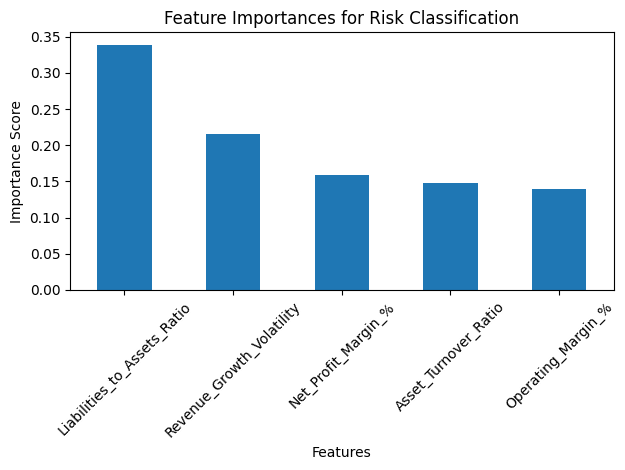

In [13]:
# Prepare target variable (risk levels)
y = master_insights_df["Risk_Level"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

# Train Random Forest classifier
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    max_depth=4
)

model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate feature importances
importances = pd.Series(
    model.feature_importances_,
    index=features
).sort_values(ascending=False)

print("Feature Importances:")
print(importances)

# Plot feature importances
importances.plot(kind='bar', title='Feature Importances for Risk Classification')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Risk_Level is constructed using a rule-based scoring framework from the same financial features. The ML model is used for interpretability (feature importance) and consistency validation, not for predictive claims.

## Revenue Growth Forecasting

We use linear regression to forecast next year's average revenue growth percentage for each sector based on historical data.

In [14]:
# Prepare time series data by sector
sector_ts = (
    master_df
    .groupby(["Sector", "Year"])["Revenue_Growth_%"]
    .mean()
    .reset_index()
).dropna()

# Initialize list to store forecasts
forecasts = []

# Forecast for each sector
for sector in sector_ts["Sector"].unique():
    # Filter data for current sector
    temp = sector_ts[sector_ts["Sector"] == sector]

    # Prepare features (years) and target (revenue growth)
    X = temp["Year"].values.reshape(-1, 1)
    y = temp["Revenue_Growth_%"].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict next year
    next_year = np.array([[temp["Year"].max() + 1]])
    forecast = model.predict(next_year)[0]

    # Store forecast
    forecasts.append({
        "Sector": sector,
        "Forecast_Year": next_year[0][0],
        "Forecast_Revenue_Growth_%": forecast
    })

# Create DataFrame with forecasts
forecast_df = pd.DataFrame(forecasts)
forecast_df

,Sector,Forecast_Year,Forecast_Revenue_Growth_%
0,Energy,2025,15.996895
1,Petrochemicals,2025,-15.789386
2,Real Estate Development,2025,76.166236
3,Telecommunications,2025,9.200039


### Key Insights

Based on our comprehensive analysis, here are the main findings:

- **Telecommunications** is the most stable sector with the lowest risk, benefiting from consistent demand and regulatory stability.
- **Energy** offers high profitability but elevated cyclicality due to oil price volatility and market fluctuations.
- **Petrochemicals** show moderate stability with demand-driven volatility influenced by global chemical markets.
- **Real Estate Development** exhibits the highest risk-growth tradeoff, affected by economic cycles and market conditions.

These insights can help investors and stakeholders make informed decisions about sector allocation and risk management.

## Final Observations

- **Risk Assessment**: Conducted at the company level using key financial indicators including volatility, leverage, profitability, and efficiency metrics.
- **Feature Importance**: Analysis confirms that leverage (liabilities-to-assets ratio) and revenue volatility are the primary drivers of risk in our model.
- **Growth Forecasting**: Applied at the sector level to capture macroeconomic and industry-wide dynamics rather than individual company performance.
- **Forecast Limitations**: Results are directional and reflect cyclical behavior rather than precise future outcomes. Actual performance may vary due to unforeseen market events, regulatory changes, or competitive dynamics.

**Recommendations for Future Analysis:**
- Incorporate macroeconomic indicators (e.g., oil prices, interest rates)
- Include more granular company-specific data
- Validate forecasts with out-of-sample testing
- Consider non-linear forecasting models for better accuracy

## Saving Results

We export all key DataFrames and results to Excel and CSV files for further analysis or reporting.

In [15]:
# Save master financial data
master_df.to_excel("master_financial_data.xlsx", index=False)

# Save master financial insights with risk scores
master_insights_df.to_excel("master_financial_insights.xlsx", index=False)

# Save sector summary statistics
sector_df.to_excel("sector_summary.xlsx", index=False)

# Save scaled features for potential reuse
X_scaled.to_csv("scaled_features.csv", index=False)

# Save revenue growth forecasts
forecast_df.to_excel("sector_revenue_growth_forecasts.xlsx", index=False)

print("All results have been saved successfully!")

All results have been saved successfully!
